# Level 14: walk around

[http://www.pythonchallenge.com/pc/return/italy.html](http://www.pythonchallenge.com/pc/return/italy.html)

## 線索

一張螺旋花紋的麵包照片，下面還有一個長得像條碼的圖片

html source 寫著：
> remember: 100*100 = (100+99+99+98) + (...

嗯... 不太懂...

暫時沒有什麼其他的線索了，先單獨來看看頁面上的圖片

italy.jpg 看起來沒什麼特別的，但是另開那張像是條碼的 wire.png 時，才發現他其實不是一張方方正正的圖片，而是 10000px * 1px

是要把它重新改拼成 100*100 的圖片嗎？

## 嘗試


In [1]:
from PIL import Image
import urllib.request

baseurl = "http://www.pythonchallenge.com/pc/return/"

pwmgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
pwmgr.add_password(None, baseurl, "huge", "file")
auth_handler = urllib.request.HTTPBasicAuthHandler(pwmgr)
opener = urllib.request.build_opener(auth_handler)
urllib.request.install_opener(opener)

In [2]:
url = "http://www.pythonchallenge.com/pc/return/wire.png"

data = urllib.request.urlopen(url)
im = Image.open(data)
display(im)

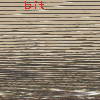

In [3]:
im_new = Image.new("RGB", (100, 100), "black")

for y in range(100):
    for x in range(100):
        im_new.putpixel((x, y), im.getpixel((y * 100 + x, 0)))

display(im_new)


上方寫著紅色的 bit 字樣

試試看 ```http://www.pythonchallenge.com/pc/return/bit.html```

得到回覆的頁面寫著：
> you took the wrong curve. 

喔？走錯路了？

對了，html source 的那句提示好像也還沒用到
> remember: 100*100 = (100+99+99+98) + (...

(抬頭看看螺旋麵包...)

(算了一下)

喔！如果從左上角開始順時針方向繞著外圈，第一圈加起來的確就是 100+99+99+98 呢！

所以試看看從左上角開始由外而內用繞螺旋的方式，把它重新改拼成 100*100 的圖片

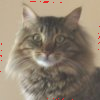

In [4]:
im_new = Image.new("RGB", (100, 100), "black")

pos = (0, 0)
seen = set()

adj_coords = ((1, 0), (0, 1), (-1, 0), (0, -1))
direction = 0

for i in range(10000):
    im_new.putpixel(pos, im.getpixel((i, 0)))
    seen.add(pos)

    next_pos = tuple(i + j for i, j in zip(pos, adj_coords[direction]))
    if next_pos in seen or not all(0 <= p < 100 for p in next_pos):
        direction = (direction + 1) % 4
        next_pos = tuple(i + j for i, j in zip(pos, adj_coords[direction]))
    pos = next_pos

display(im_new)

哇嗚，是一隻貓

試試看 ```http://www.pythonchallenge.com/pc/return/cat.html```

又得到回覆的頁面寫著：
> and its name is uzi. you'll hear from him later. 

改成 ```http://www.pythonchallenge.com/pc/return/uzi.html``` 試試

沒錯，這就是下一關的網址囉